# Baby Names

*  Lais Isabelle ALVES DOS SANTOS
*  Pedro ANDRADE FERREIRA SOBRINHO
*  Giulia MANNAIOLI

### Data Preparation

### Visualization 1

How do baby names evolve over time? Are there names that have consistently remained popular or unpopular? Are there some that have were suddenly or briefly popular or unpopular? Are there trends in time?

#### Sketches

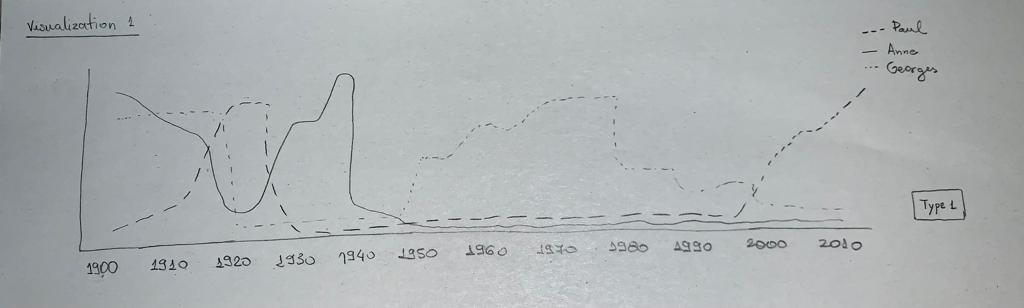

In [1]:
from IPython.display import Image
Image(filename="../vis1_im1.jpeg")

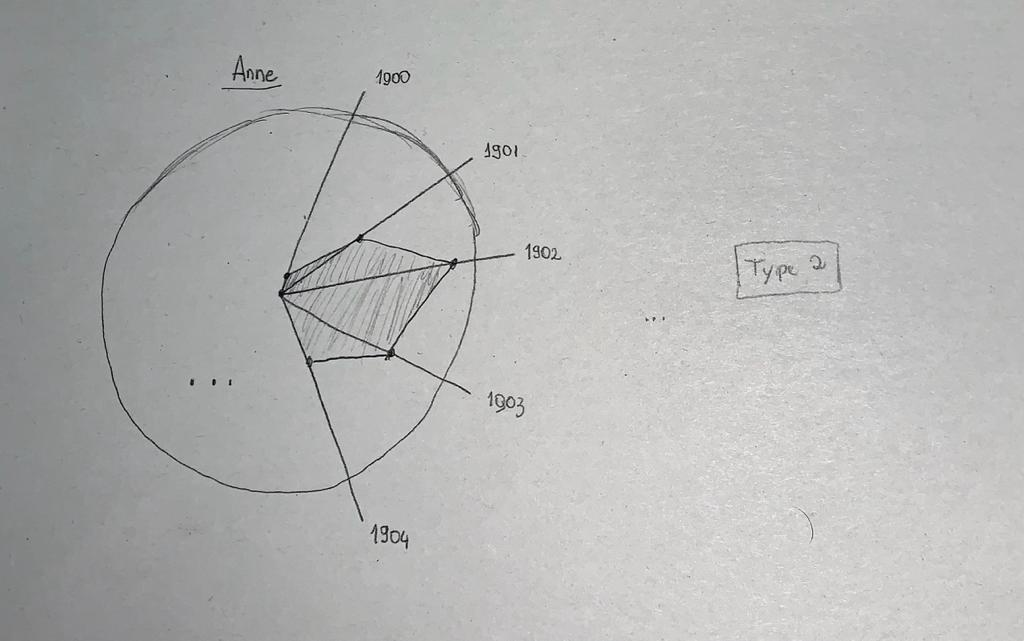

In [2]:
from IPython.display import Image
Image(filename="../vis1_im2.jpeg")

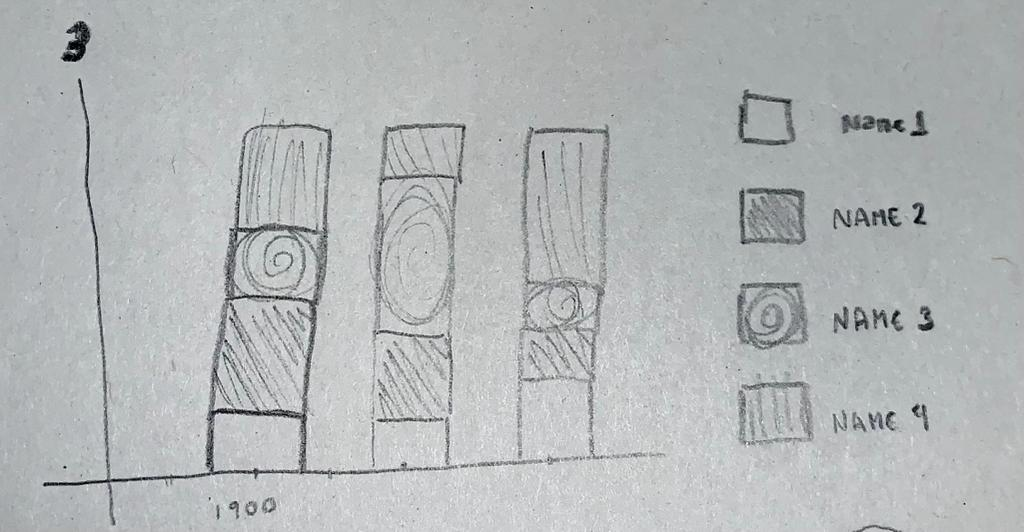

In [4]:
from IPython.display import Image
Image(filename="../vis1_im3.jpeg")

#### Implementation

### Visualization 2 

Is there a regional effect in the data? Are some names more popular in some regions? Are popular names generally popular across the whole country?

#### Sketches

#### Implementation

### Visualization 3

Are there gender effects in the data? Does popularity of names given to both sexes evolve consistently?

#### Sketches

#### Implementation